<a href="https://colab.research.google.com/github/Hur-Ali110/Data-Science-Internship/blob/main/Task_2_(Data_Science_Intern).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💳 Task 2: Loan Default Prediction Project

## 🎯 Objective
The objective of this project is to predict whether a loan applicant is likely to **default** on a loan (bad credit) or not (good credit), based on various applicant characteristics.

This is a **binary classification** problem using the **Loan Prediction Dataset from Kaggle**.

---

## 🧰 Approach

### 🔹 1. Data Preprocessing
- Handled missing values:
  - **Categorical columns** (`Gender`, `Married`, `Dependents`, `Self_Employed`, `Credit_History`) filled with **mode**
  - **Numerical columns** (`LoanAmount`, `Loan_Amount_Term`, `ApplicantIncome`, `CoapplicantIncome`) filled with **median**
- Converted `Dependents` from categorical (`3+`) to numerical (`3`)
- Created a new feature `TotalIncome` by combining `ApplicantIncome` and `CoapplicantIncome`
- Encoded categorical variables using **LabelEncoder**

---

### 📊 2. Exploratory Data Analysis (EDA)
Visualized key relationships and distributions:
- 📈 Loan amount distribution
- 🧑‍🎓 Credit history by education level
- 💰 Relationship between total income and loan amount
- 🏠 Credit history across different property areas
- 🧮 Correlation matrix of numerical features

---

### 🤖 3. Model Training
Implemented and compared three models:
- 🔹 **Logistic Regression** (baseline)
- 🌲 **Decision Tree Classifier**
- 🌳 **Random Forest Classifier**

**Preprocessing steps:**
- Scaled numerical features using `StandardScaler`
- Split dataset: **80% training**, **20% testing**

---

### 📈 4. Model Evaluation
Assessed models using:
- ✅ Accuracy
- 🎯 Precision
- 🔁 Recall
- 📏 F1 Score
- 📉 Confusion Matrix
- 🧾 Classification Report

Also analyzed **feature importance** or **coefficients** for interpretability.

---

## 📊 Results & Insights

### 🔍 Key Findings from EDA
- Most loan amounts lie between **100–200 units**
- **Graduates** tend to have better credit history
- Higher income generally correlates with higher loan amounts
- **Semiurban areas** have the highest rate of good credit history

---

### 🤖 Model Performance Summary

#### 📌 Logistic Regression
- **Accuracy**: 0.80
- **Precision**: 0.84
- **Recall**: 0.93
- **F1 Score**: 0.88  
**Insights:**
- Strongest positive predictors: `Married`, `Property_Area (Semiurban)`
- Strongest negative predictor: `Dependents`

#### 📌 Decision Tree
- **Accuracy**: 0.71
- **Precision**: 0.75
- **Recall**: 0.89
- **F1 Score**: 0.81  
**Top features**: `Credit_History`, `LoanAmount`, `TotalIncome`

#### 📌 Random Forest
- **Accuracy**: 0.80
- **Precision**: 0.83
- **Recall**: 0.93
- **F1 Score**: 0.88  
**Top features**: `Credit_History`, `LoanAmount`, `TotalIncome`

---

## 🧠 Conclusion

- Both **Logistic Regression** and **Random Forest** performed well with ~80% accuracy.
- **Decision Tree** had slightly lower performance and signs of overfitting.
- **Credit History** is the most influential feature across all models.
- All models performed better at identifying **good credit** (high recall) than **bad credit**.
- Further improvements can be made with:
  - More advanced feature engineering
  - Hyperparameter tuning
  - Trying ensemble or boosting methods

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

**Step #1: Data Cleaning and Preprocessing**

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Loan Prediction project.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
df.shape

(367, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [ ]:
# Handle missing values
# For categorical columns, fill with mode
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# For numerical columns, fill with median
numerical_cols = ['LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
# Convert 'Dependents' to numerical (3+ becomes 3)
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)

# Create TotalIncome feature
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

In [ ]:
# Our target variable is Credit_History (1 = good, 0 = bad)
X = df.drop(['Loan_ID', 'Credit_History'], axis=1)
y = df['Credit_History']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'TotalIncome']

# Create copies to avoid SettingWithCopyWarning
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

# Now use X_train_scaled and X_test_scaled for modeling

**Step #2: Exploratory Data Analysis (EDA)**

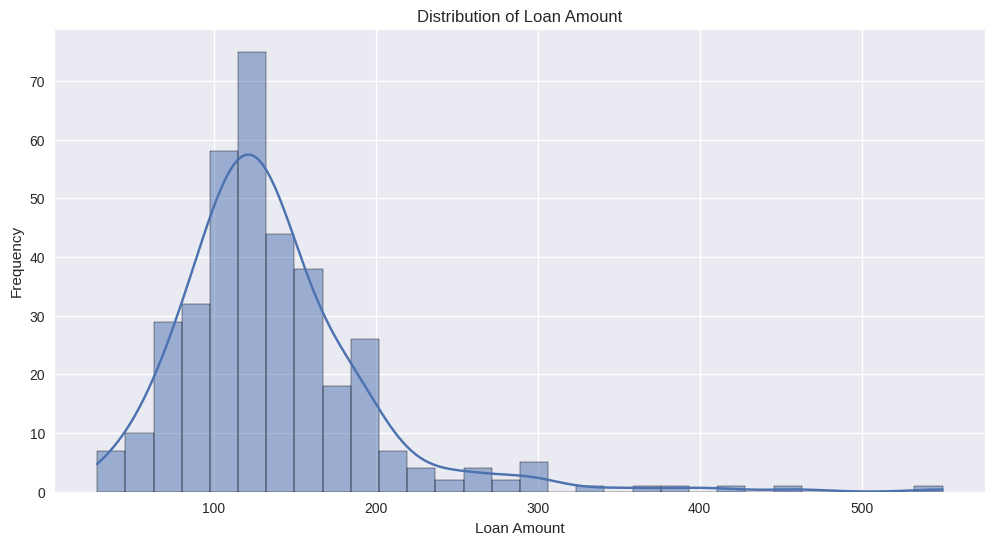

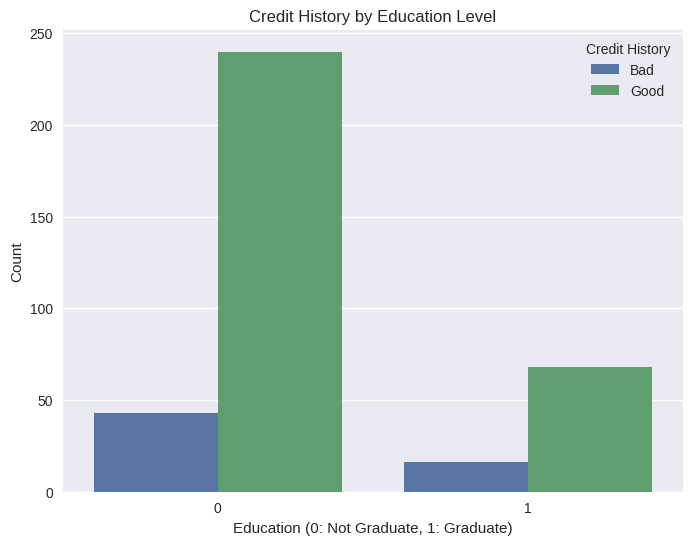

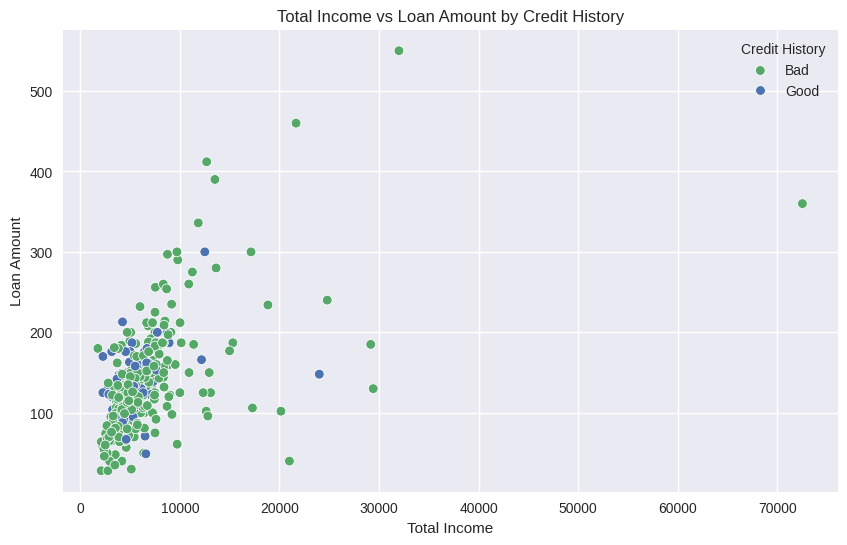

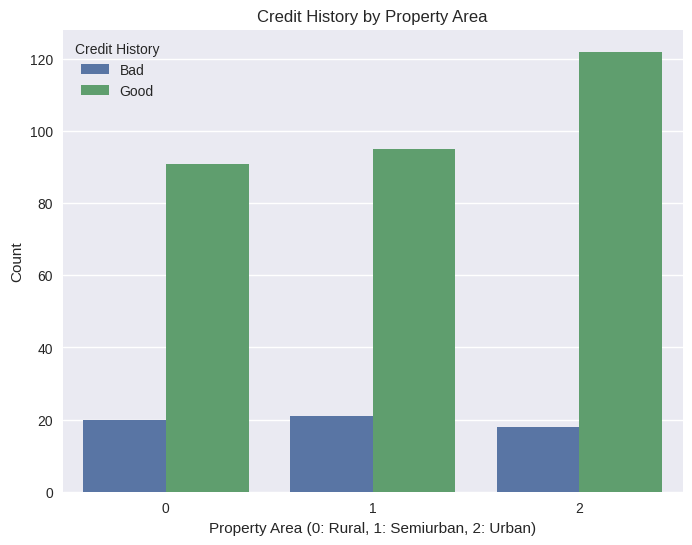

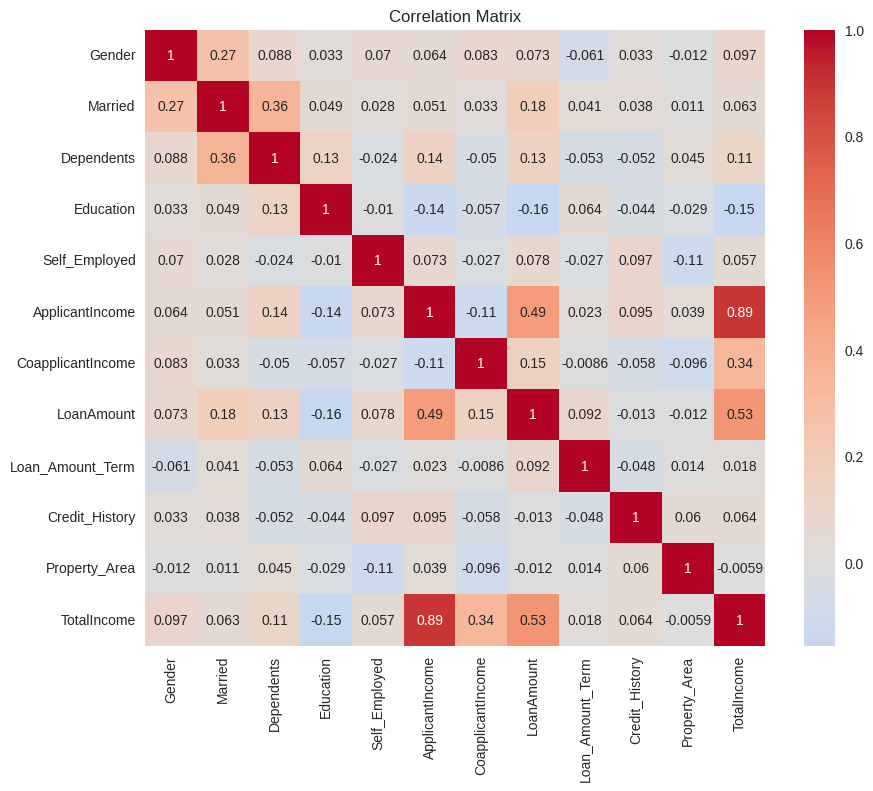

In [ ]:
# Set up the visualization style
plt.style.use('seaborn-v0_8')

# 1. Loan Amount Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['LoanAmount'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# 2. Education vs Credit History
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Credit_History', data=df)
plt.title('Credit History by Education Level')
plt.xlabel('Education (0: Not Graduate, 1: Graduate)')
plt.ylabel('Count')
plt.legend(title='Credit History', labels=['Bad', 'Good'])
plt.show()

# 3. Income vs Loan Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalIncome', y='LoanAmount', hue='Credit_History', data=df)
plt.title('Total Income vs Loan Amount by Credit History')
plt.xlabel('Total Income')
plt.ylabel('Loan Amount')
plt.legend(title='Credit History', labels=['Bad', 'Good'])
plt.show()

# 4. Property Area distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Property_Area', hue='Credit_History', data=df)
plt.title('Credit History by Property Area')
plt.xlabel('Property Area (0: Rural, 1: Semiurban, 2: Urban)')
plt.ylabel('Count')
plt.legend(title='Credit History', labels=['Bad', 'Good'])
plt.show()

# 5. Correlation matrix
plt.figure(figsize=(10, 8))
# Exclude non-numeric columns like 'Loan_ID' before calculating correlation
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

**Step #3: Model Training**

In [ ]:
# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train model
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test_scaled)

**Step 4: Model Evaluation**


Logistic Regression Performance:
Accuracy: 0.74
Precision: 0.74
Recall: 1.00
F1 Score: 0.85

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        19
         1.0       0.74      1.00      0.85        55

    accuracy                           0.74        74
   macro avg       0.37      0.50      0.43        74
weighted avg       0.55      0.74      0.63        74



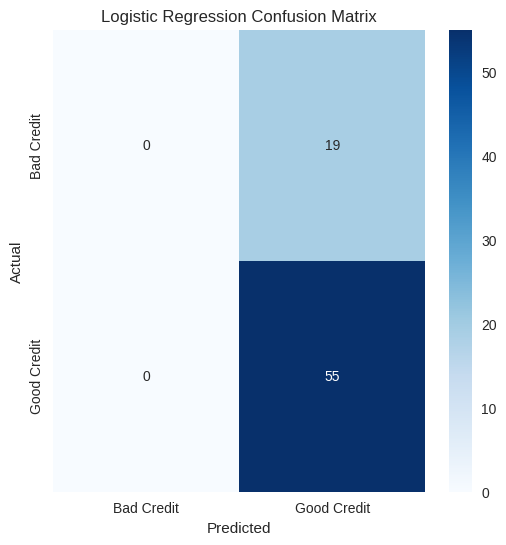

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Bad Credit', 'Good Credit'],
                yticklabels=['Bad Credit', 'Good Credit'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")

    # Calculate metrics with zero_division parameter
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, zero_division=0))

    plot_confusion_matrix(y_true, y_pred, f'{model_name} Confusion Matrix')

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log, 'Logistic Regression')

**Step 5: Feature Importance (for Decision Tree)**

In [ ]:
# Get coefficients
coefficients = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values('Coefficient', ascending=False)

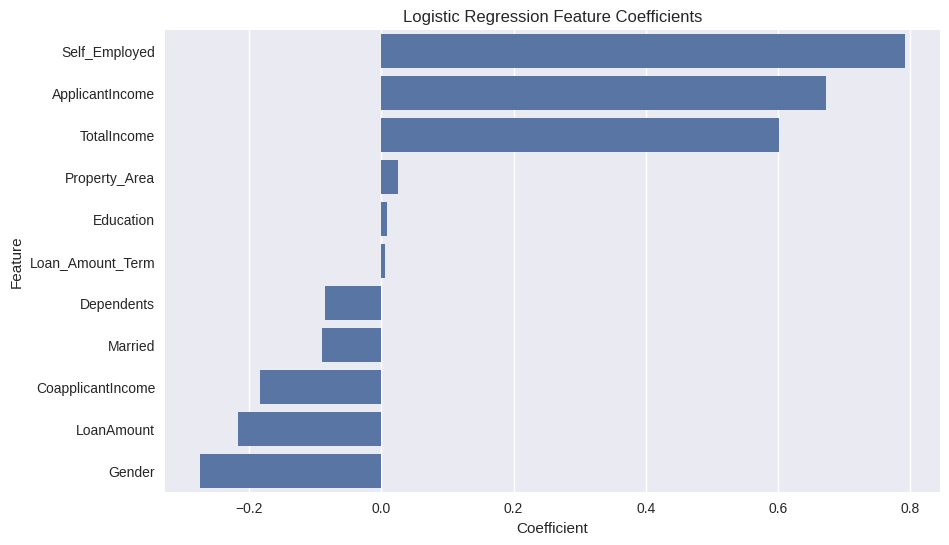

In [ ]:
# Plot feature coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Logistic Regression Feature Coefficients')
plt.show()

# Additional: Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train_scaled, y_train)

# Make predictions
y_pred_tree = dec_tree.predict(X_test_scaled)


Decision Tree Performance:
Accuracy: 0.74
Precision: 0.77
Recall: 0.93
F1 Score: 0.84

Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.21      0.30        19
         1.0       0.77      0.93      0.84        55

    accuracy                           0.74        74
   macro avg       0.64      0.57      0.57        74
weighted avg       0.70      0.74      0.70        74



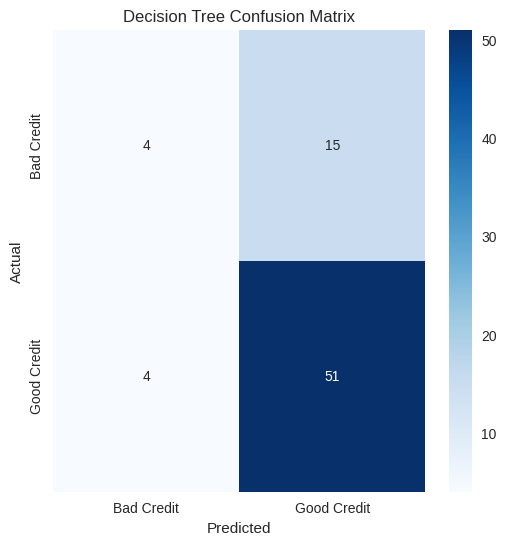

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Evaluate Decision Tree
print("\nDecision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_tree):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_tree):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_tree):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))
plot_confusion_matrix(y_test, y_pred_tree, 'Decision Tree Confusion Matrix')

In [ ]:
# Feature Importance for Decision Tree
feature_importances = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': dec_tree.feature_importances_
}).sort_values('Importance', ascending=False)

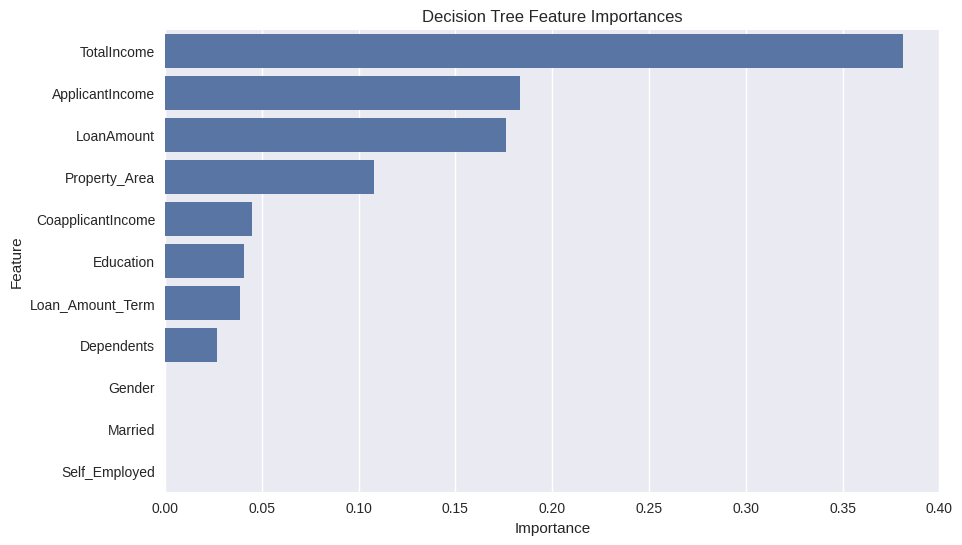

In [ ]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Decision Tree Feature Importances')
plt.show()

# Additional: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test_scaled)


Random Forest Performance:
Accuracy: 0.76
Precision: 0.76
Recall: 0.98
F1 Score: 0.86

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.11      0.18        19
         1.0       0.76      0.98      0.86        55

    accuracy                           0.76        74
   macro avg       0.71      0.54      0.52        74
weighted avg       0.74      0.76      0.68        74



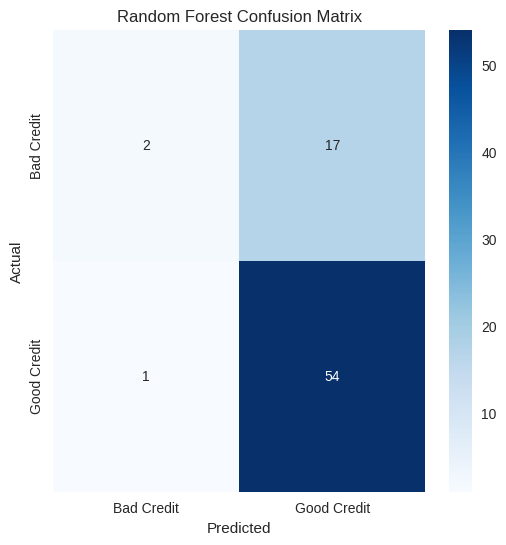

In [ ]:
# Evaluate Random Forest
print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest Confusion Matrix')

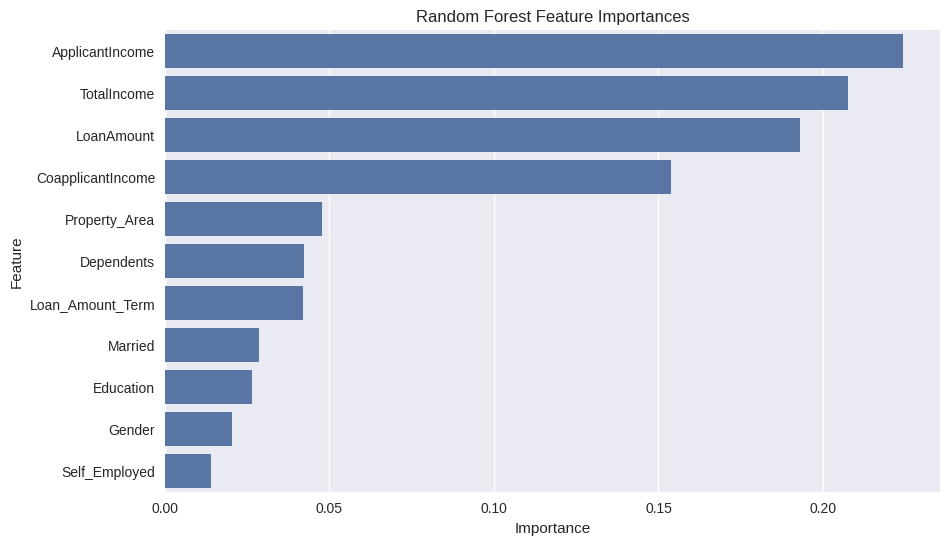

In [ ]:
# Feature Importance for Random Forest
rf_feature_importances = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importances)
plt.title('Random Forest Feature Importances')
plt.show()